In [24]:
# Import Library Dependencies
import matplotlib.pyplot as plt
import datetime as dt
import pandas as pd
import numpy as np

# Import Custom API Functions
from apidata import quandl_stock_data

%matplotlib notebook

In [2]:
pfolio_assets = [
    "AMZN",
    "PFE",
    "AMD",
    "HAL",
    "PG",
    "COF",    
]


In [ ]:
# Portfolio Stock Selection
pfolio_assets = [
    "AAPL", 
    "T", 
    "AMZN", 
    "PG", 
    "BAC", 
    "AA", 
    "FCX", 
    "MSFT", 
    "GM", 
    "SBUX",
]

print(f'Number of Portfolio Assets: {len(pfolio_assets)}')

In [3]:
# Initializing DataFrame
portfolio = quandl_stock_data(pfolio_assets[0], verbose=True) \
            .rename(columns={"Close": pfolio_assets[0].upper()})[pfolio_assets[0].upper()] \
            .reset_index()


[Quandl] Query API Summary:

--------------------------------------------------------------------------- 

- symbol: AMZN
- start_date: 2014-01-01
- end_date: 2019-01-01
- collapse: monthly
- data_type: pandas

 --------------------------------------------------------------------------- 


[Preview] Response DataFrame


               Open     High      Low   Close     Volume
Date                                                   
2014-01-02  398.80  399.360  394.020  397.97  2137800.0
2014-01-03  398.29  402.710  396.220  396.44  2210200.0
2014-01-06  395.85  397.000  388.420  393.63  3170600.0
2014-01-07  395.04  398.470  394.290  398.03  1916000.0
2014-01-08  398.47  403.000  396.040  401.92  2316500.0
2014-01-09  403.71  406.890  398.440  401.01  2103000.0
2014-01-10  402.53  403.764  393.800  397.66  2679500.0
2014-01-13  397.98  399.780  388.450  390.98  2844900.0
2014-01-14  392.13  398.630  391.290  397.54  2340100.0
2014-01-15  398.94  399.310  392.534  395.87  2678300.0 

--

In [4]:
# Generate Portfolio DataFrame:
# [1] Query Stock Return Data - Quandl API Call
# [2] Merge Stock Returns into Portfolio DataFrame 

for i, stock in enumerate(pfolio_assets[1:]):
    print(f"<Quandl API Call> [{i+1}] Stock Symbol: {stock}")
    add_stock = quandl_stock_data(stock) \
                .rename(columns={"Close": stock})[stock] \
                .reset_index()
    
    portfolio = pd.merge(portfolio, add_stock, on="Date", how="inner")
    
print (f"\nAsset Returns: Merged // Portfolio DataFrame: <Complete>")

<Quandl API Call> [1] Stock Symbol: PFE
<Quandl API Call> [2] Stock Symbol: AMD
<Quandl API Call> [3] Stock Symbol: HAL
<Quandl API Call> [4] Stock Symbol: PG
<Quandl API Call> [5] Stock Symbol: COF

Asset Returns: Merged // Portfolio DataFrame: <Complete>


In [5]:
# Set DataFrame Index (Date)
portfolio.set_index("Date", inplace=True)
portfolio.head(15)

,AMZN,PFE,AMD,HAL,PG,COF
Date,,,,,,
2014-01-02,397.97,30.46,3.95,50.01,80.54,77.25
2014-01-03,396.44,30.52,4.00,50.13,80.45,77.34
2014-01-06,393.63,30.55,4.13,50.32,80.64,76.59
2014-01-07,398.03,30.74,4.18,50.20,81.42,77.28
2014-01-08,401.92,30.95,4.18,49.50,80.24,77.85
2014-01-09,401.01,30.93,4.09,49.61,80.42,77.85
2014-01-10,397.66,30.69,4.17,50.52,80.30,78.02
2014-01-13,390.98,30.54,4.13,49.58,80.01,76.37
2014-01-14,397.54,31.00,4.30,50.40,80.87,77.36


In [6]:
# View DataFrame -- Data Completeness
portfolio.count()

AMZN    1064
PFE     1064
AMD     1064
HAL     1064
PG      1064
COF     1064
dtype: int64

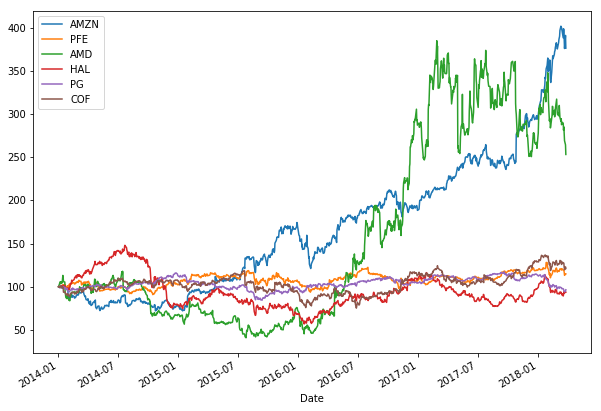

In [7]:
# [Visualize] Plot Data Frame -- Closing Prices
visual_plot = (portfolio/portfolio.iloc[0] * 100).plot(figsize=(10,7))

In [8]:
# Convert Stock Price Data into Log Returns -- Removed Offset Row
log_returns = np.log(portfolio / portfolio.shift(1)).iloc[1:]
log_returns[:15]

,AMZN,PFE,AMD,HAL,PG,COF
Date,,,,,,
2014-01-03,-0.003852,0.001968,0.012579,0.002397,-0.001118,0.001164
2014-01-06,-0.007113,0.000982,0.031983,0.003783,0.002359,-0.009745
2014-01-07,0.011116,0.006200,0.012034,-0.002388,0.009626,0.008969
2014-01-08,0.009726,0.006808,0.000000,-0.014042,-0.014599,0.007349
2014-01-09,-0.002267,-0.000646,-0.021766,0.002220,0.002241,0.000000
2014-01-10,-0.008389,-0.007790,0.019371,0.018177,-0.001493,0.002181
2014-01-13,-0.016941,-0.004900,-0.009639,-0.018782,-0.003618,-0.021375
2014-01-14,0.016639,0.014950,0.040338,0.016404,0.010691,0.012880
2014-01-15,-0.004210,0.005790,0.038773,0.004751,-0.000990,-0.004275


In [9]:
# Calculate Average Annual Log Returns 
log_returns.mean()*250

AMZN    0.311589
PFE     0.032742
AMD     0.218455
HAL    -0.015200
PG     -0.008171
COF     0.045202
dtype: float64

In [10]:
# Portfolio Asset Covariance Matrix
log_returns.cov() * 250

,AMZN,PFE,AMD,HAL,PG,COF
AMZN,0.086065,0.012405,0.030296,0.021427,0.008945,0.013754
PFE,0.012405,0.030334,0.017896,0.015098,0.007854,0.016413
AMD,0.030296,0.017896,0.354742,0.038696,0.011578,0.031391
HAL,0.021427,0.015098,0.038696,0.095860,0.008888,0.026961
PG,0.008945,0.007854,0.011578,0.008888,0.019098,0.009539
COF,0.013754,0.016413,0.031391,0.026961,0.009539,0.055811


In [11]:
# Portfolio Asset Correlation Matrix
log_returns.corr()

,AMZN,PFE,AMD,HAL,PG,COF
AMZN,1.000000,0.242780,0.173386,0.235901,0.220633,0.198454
PFE,0.242780,1.000000,0.172524,0.279990,0.326310,0.398912
AMD,0.173386,0.172524,1.000000,0.209842,0.140662,0.223096
HAL,0.235901,0.279990,0.209842,1.000000,0.207726,0.368597
PG,0.220633,0.326310,0.140662,0.207726,1.000000,0.292179
COF,0.198454,0.398912,0.223096,0.368597,0.292179,1.000000


In [12]:
# Count Number of Assets in Portfolio
num_assets = (len(pfolio_assets) )
num_assets

6

In [14]:
# Simulate 10k Random Portfolios
pfolio_sims = []
pfolio = {}

mkt_return = .098
sim_trials = 5000
for i in range(sim_trials):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    
    WTSp = zip(pfolio_assets, weights)
    RTNp = np.sum(weights * log_returns.mean()) * 250
    VOLp = np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights)))
    
    pfolio = {a:round(wt, 4) for a,wt in WTSp}
    pfolio["RTN"] = round(RTNp, 4)
    pfolio["VOL"] = round(VOLp, 4)
    pfolio["Sharpe"] = round((RTNp - mkt_return)/VOLp, 4)
    pfolio_sims.append(pfolio)
    
    print("\n",pfolio, "\n")

print(">>> Data Points Generated -- Simulation Complete <<<")


 {'AMZN': 0.3816, 'PFE': 0.1335, 'AMD': 0.0891, 'HAL': 0.0871, 'PG': 0.1688, 'COF': 0.1399, 'RTN': 0.1464, 'VOL': 0.1746, 'Sharpe': 0.2771} 


 {'AMZN': 0.0036, 'PFE': 0.1671, 'AMD': 0.1578, 'HAL': 0.081, 'PG': 0.3667, 'COF': 0.2237, 'RTN': 0.047, 'VOL': 0.1641, 'Sharpe': -0.311} 


 {'AMZN': 0.1932, 'PFE': 0.2086, 'AMD': 0.0002, 'HAL': 0.2488, 'PG': 0.155, 'COF': 0.1941, 'RTN': 0.0708, 'VOL': 0.1579, 'Sharpe': -0.1722} 


 {'AMZN': 0.2646, 'PFE': 0.0516, 'AMD': 0.1451, 'HAL': 0.2876, 'PG': 0.008, 'COF': 0.2432, 'RTN': 0.1224, 'VOL': 0.2073, 'Sharpe': 0.1176} 


 {'AMZN': 0.2158, 'PFE': 0.0491, 'AMD': 0.325, 'HAL': 0.2564, 'PG': 0.0151, 'COF': 0.1385, 'RTN': 0.1421, 'VOL': 0.2632, 'Sharpe': 0.1675} 


 {'AMZN': 0.0546, 'PFE': 0.2958, 'AMD': 0.3498, 'HAL': 0.1957, 'PG': 0.073, 'COF': 0.031, 'RTN': 0.101, 'VOL': 0.2561, 'Sharpe': 0.0115} 


 {'AMZN': 0.1097, 'PFE': 0.2488, 'AMD': 0.0831, 'HAL': 0.2511, 'PG': 0.0648, 'COF': 0.2425, 'RTN': 0.0671, 'VOL': 0.1726, 'Sharpe': -0.1792} 


 {'A

 {'AMZN': 0.2564, 'PFE': 0.224, 'AMD': 0.0616, 'HAL': 0.0185, 'PG': 0.1596, 'COF': 0.2799, 'RTN': 0.1117, 'VOL': 0.1566, 'Sharpe': 0.0878} 


 {'AMZN': 0.0576, 'PFE': 0.3428, 'AMD': 0.0137, 'HAL': 0.2598, 'PG': 0.2561, 'COF': 0.0701, 'RTN': 0.0293, 'VOL': 0.1463, 'Sharpe': -0.4696} 


 {'AMZN': 0.2001, 'PFE': 0.2212, 'AMD': 0.2174, 'HAL': 0.1862, 'PG': 0.0755, 'COF': 0.0996, 'RTN': 0.1181, 'VOL': 0.205, 'Sharpe': 0.0981} 


 {'AMZN': 0.1933, 'PFE': 0.1713, 'AMD': 0.1973, 'HAL': 0.2007, 'PG': 0.1218, 'COF': 0.1156, 'RTN': 0.1101, 'VOL': 0.1972, 'Sharpe': 0.0615} 


 {'AMZN': 0.1445, 'PFE': 0.2518, 'AMD': 0.1438, 'HAL': 0.0066, 'PG': 0.2952, 'COF': 0.1581, 'RTN': 0.0893, 'VOL': 0.1581, 'Sharpe': -0.0549} 


 {'AMZN': 0.2027, 'PFE': 0.1533, 'AMD': 0.2353, 'HAL': 0.0387, 'PG': 0.1104, 'COF': 0.2596, 'RTN': 0.1298, 'VOL': 0.2079, 'Sharpe': 0.153} 


 {'AMZN': 0.0249, 'PFE': 0.2327, 'AMD': 0.2942, 'HAL': 0.3035, 'PG': 0.1315, 'COF': 0.0133, 'RTN': 0.0745, 'VOL': 0.2381, 'Sharpe': -0.0985} 




 {'AMZN': 0.3583, 'PFE': 0.0073, 'AMD': 0.0593, 'HAL': 0.3418, 'PG': 0.0271, 'COF': 0.2063, 'RTN': 0.1287, 'VOL': 0.2032, 'Sharpe': 0.1513} 


 {'AMZN': 0.1402, 'PFE': 0.108, 'AMD': 0.0694, 'HAL': 0.0195, 'PG': 0.0708, 'COF': 0.5922, 'RTN': 0.0883, 'VOL': 0.1838, 'Sharpe': -0.0529} 


 {'AMZN': 0.3375, 'PFE': 0.0261, 'AMD': 0.25, 'HAL': 0.2825, 'PG': 0.0048, 'COF': 0.099, 'RTN': 0.1608, 'VOL': 0.2443, 'Sharpe': 0.257} 


 {'AMZN': 0.0202, 'PFE': 0.0558, 'AMD': 0.2747, 'HAL': 0.1412, 'PG': 0.2754, 'COF': 0.2326, 'RTN': 0.0742, 'VOL': 0.2189, 'Sharpe': -0.1085} 


 {'AMZN': 0.2943, 'PFE': 0.1017, 'AMD': 0.1764, 'HAL': 0.1872, 'PG': 0.0697, 'COF': 0.1707, 'RTN': 0.1379, 'VOL': 0.2017, 'Sharpe': 0.1977} 


 {'AMZN': 0.2094, 'PFE': 0.2775, 'AMD': 0.0388, 'HAL': 0.2328, 'PG': 0.0243, 'COF': 0.2172, 'RTN': 0.0889, 'VOL': 0.1687, 'Sharpe': -0.0541} 


 {'AMZN': 0.2396, 'PFE': 0.0823, 'AMD': 0.0018, 'HAL': 0.207, 'PG': 0.2392, 'COF': 0.2301, 'RTN': 0.083, 'VOL': 0.1565, 'Sharpe': -0.0956} 


 


 {'AMZN': 0.2778, 'PFE': 0.2417, 'AMD': 0.2559, 'HAL': 0.1271, 'PG': 0.0747, 'COF': 0.0229, 'RTN': 0.1489, 'VOL': 0.2206, 'Sharpe': 0.2306} 


 {'AMZN': 0.1458, 'PFE': 0.2777, 'AMD': 0.2317, 'HAL': 0.2114, 'PG': 0.0626, 'COF': 0.0708, 'RTN': 0.1046, 'VOL': 0.2096, 'Sharpe': 0.0316} 


 {'AMZN': 0.1888, 'PFE': 0.3073, 'AMD': 0.1306, 'HAL': 0.0297, 'PG': 0.2423, 'COF': 0.1013, 'RTN': 0.0996, 'VOL': 0.1575, 'Sharpe': 0.01} 


 {'AMZN': 0.1685, 'PFE': 0.1566, 'AMD': 0.3065, 'HAL': 0.0091, 'PG': 0.1109, 'COF': 0.2483, 'RTN': 0.1348, 'VOL': 0.2352, 'Sharpe': 0.1564} 


 {'AMZN': 0.1362, 'PFE': 0.1721, 'AMD': 0.0451, 'HAL': 0.2876, 'PG': 0.1688, 'COF': 0.1902, 'RTN': 0.0608, 'VOL': 0.164, 'Sharpe': -0.2269} 


 {'AMZN': 0.296, 'PFE': 0.0061, 'AMD': 0.1475, 'HAL': 0.0597, 'PG': 0.3984, 'COF': 0.0923, 'RTN': 0.1247, 'VOL': 0.1727, 'Sharpe': 0.1543} 


 {'AMZN': 0.1549, 'PFE': 0.224, 'AMD': 0.1481, 'HAL': 0.1823, 'PG': 0.1941, 'COF': 0.0965, 'RTN': 0.088, 'VOL': 0.1721, 'Sharpe': -0.0583} 


 {

 {'AMZN': 0.2296, 'PFE': 0.1272, 'AMD': 0.1618, 'HAL': 0.2075, 'PG': 0.1839, 'COF': 0.0901, 'RTN': 0.1105, 'VOL': 0.1854, 'Sharpe': 0.0672} 


 {'AMZN': 0.1846, 'PFE': 0.03, 'AMD': 0.1979, 'HAL': 0.1456, 'PG': 0.308, 'COF': 0.134, 'RTN': 0.1031, 'VOL': 0.1883, 'Sharpe': 0.0269} 


 {'AMZN': 0.1556, 'PFE': 0.3044, 'AMD': 0.0695, 'HAL': 0.0743, 'PG': 0.2448, 'COF': 0.1515, 'RTN': 0.0773, 'VOL': 0.1429, 'Sharpe': -0.1445} 


 {'AMZN': 0.241, 'PFE': 0.1593, 'AMD': 0.2577, 'HAL': 0.1404, 'PG': 0.0293, 'COF': 0.1722, 'RTN': 0.142, 'VOL': 0.2251, 'Sharpe': 0.1956} 


 {'AMZN': 0.0503, 'PFE': 0.2388, 'AMD': 0.2198, 'HAL': 0.1696, 'PG': 0.2079, 'COF': 0.1136, 'RTN': 0.0724, 'VOL': 0.1936, 'Sharpe': -0.1324} 


 {'AMZN': 0.3547, 'PFE': 0.3349, 'AMD': 0.0053, 'HAL': 0.1641, 'PG': 0.0019, 'COF': 0.1391, 'RTN': 0.1264, 'VOL': 0.1716, 'Sharpe': 0.1655} 


 {'AMZN': 0.106, 'PFE': 0.0906, 'AMD': 0.0499, 'HAL': 0.0623, 'PG': 0.3815, 'COF': 0.3096, 'RTN': 0.0568, 'VOL': 0.1423, 'Sharpe': -0.2894} 


 {'


 {'AMZN': 0.0561, 'PFE': 0.0029, 'AMD': 0.2374, 'HAL': 0.081, 'PG': 0.4146, 'COF': 0.208, 'RTN': 0.0742, 'VOL': 0.196, 'Sharpe': -0.1214} 


 {'AMZN': 0.321, 'PFE': 0.1007, 'AMD': 0.1599, 'HAL': 0.0534, 'PG': 0.2927, 'COF': 0.0722, 'RTN': 0.1383, 'VOL': 0.1795, 'Sharpe': 0.2246} 


 {'AMZN': 0.1779, 'PFE': 0.2203, 'AMD': 0.164, 'HAL': 0.2278, 'PG': 0.0757, 'COF': 0.1343, 'RTN': 0.1005, 'VOL': 0.1896, 'Sharpe': 0.013} 


 {'AMZN': 0.1136, 'PFE': 0.2606, 'AMD': 0.2193, 'HAL': 0.0425, 'PG': 0.2325, 'COF': 0.1314, 'RTN': 0.0952, 'VOL': 0.187, 'Sharpe': -0.0147} 


 {'AMZN': 0.0206, 'PFE': 0.0012, 'AMD': 0.0779, 'HAL': 0.4221, 'PG': 0.0486, 'COF': 0.4296, 'RTN': 0.0361, 'VOL': 0.2137, 'Sharpe': -0.2898} 


 {'AMZN': 0.0853, 'PFE': 0.247, 'AMD': 0.1926, 'HAL': 0.1672, 'PG': 0.0634, 'COF': 0.2446, 'RTN': 0.0847, 'VOL': 0.1953, 'Sharpe': -0.068} 


 {'AMZN': 0.2928, 'PFE': 0.1126, 'AMD': 0.0494, 'HAL': 0.0044, 'PG': 0.0608, 'COF': 0.4799, 'RTN': 0.1268, 'VOL': 0.1784, 'Sharpe': 0.1617} 


 {'


 {'AMZN': 0.3219, 'PFE': 0.1641, 'AMD': 0.1691, 'HAL': 0.1203, 'PG': 0.0001, 'COF': 0.2245, 'RTN': 0.1509, 'VOL': 0.2014, 'Sharpe': 0.2629} 


 {'AMZN': 0.2439, 'PFE': 0.101, 'AMD': 0.0369, 'HAL': 0.2928, 'PG': 0.0835, 'COF': 0.242, 'RTN': 0.0932, 'VOL': 0.1783, 'Sharpe': -0.0271} 


 {'AMZN': 0.0642, 'PFE': 0.3362, 'AMD': 0.0911, 'HAL': 0.1137, 'PG': 0.2608, 'COF': 0.134, 'RTN': 0.0531, 'VOL': 0.1458, 'Sharpe': -0.3078} 


 {'AMZN': 0.2467, 'PFE': 0.1412, 'AMD': 0.1043, 'HAL': 0.2468, 'PG': 0.0514, 'COF': 0.2095, 'RTN': 0.1096, 'VOL': 0.1847, 'Sharpe': 0.0627} 


 {'AMZN': 0.2396, 'PFE': 0.3157, 'AMD': 0.123, 'HAL': 0.1315, 'PG': 0.0114, 'COF': 0.1789, 'RTN': 0.1178, 'VOL': 0.1777, 'Sharpe': 0.1117} 


 {'AMZN': 0.0539, 'PFE': 0.2916, 'AMD': 0.1626, 'HAL': 0.012, 'PG': 0.2384, 'COF': 0.2415, 'RTN': 0.0706, 'VOL': 0.1677, 'Sharpe': -0.1631} 


 {'AMZN': 0.0923, 'PFE': 0.2431, 'AMD': 0.2358, 'HAL': 0.1967, 'PG': 0.2264, 'COF': 0.0057, 'RTN': 0.0836, 'VOL': 0.2004, 'Sharpe': -0.0717} 



 {'AMZN': 0.059, 'PFE': 0.0752, 'AMD': 0.0094, 'HAL': 0.265, 'PG': 0.2479, 'COF': 0.3435, 'RTN': 0.0324, 'VOL': 0.1629, 'Sharpe': -0.4028} 


 {'AMZN': 0.138, 'PFE': 0.0369, 'AMD': 0.2851, 'HAL': 0.2286, 'PG': 0.2003, 'COF': 0.1111, 'RTN': 0.1064, 'VOL': 0.2315, 'Sharpe': 0.0363} 


 {'AMZN': 0.0295, 'PFE': 0.1264, 'AMD': 0.2637, 'HAL': 0.1683, 'PG': 0.2097, 'COF': 0.2024, 'RTN': 0.0758, 'VOL': 0.2158, 'Sharpe': -0.1027} 


 {'AMZN': 0.1863, 'PFE': 0.0559, 'AMD': 0.2289, 'HAL': 0.2331, 'PG': 0.0728, 'COF': 0.2231, 'RTN': 0.1158, 'VOL': 0.2198, 'Sharpe': 0.0811} 


 {'AMZN': 0.0816, 'PFE': 0.0528, 'AMD': 0.296, 'HAL': 0.0718, 'PG': 0.2221, 'COF': 0.2756, 'RTN': 0.1014, 'VOL': 0.2288, 'Sharpe': 0.0148} 


 {'AMZN': 0.2049, 'PFE': 0.1954, 'AMD': 0.0893, 'HAL': 0.1629, 'PG': 0.1181, 'COF': 0.2293, 'RTN': 0.0967, 'VOL': 0.166, 'Sharpe': -0.008} 


 {'AMZN': 0.0882, 'PFE': 0.1132, 'AMD': 0.0336, 'HAL': 0.1842, 'PG': 0.3644, 'COF': 0.2164, 'RTN': 0.0425, 'VOL': 0.1427, 'Sharpe': -0.3886} 


 


 {'AMZN': 0.2633, 'PFE': 0.2168, 'AMD': 0.0737, 'HAL': 0.2356, 'PG': 0.0248, 'COF': 0.1857, 'RTN': 0.1099, 'VOL': 0.1778, 'Sharpe': 0.0668} 


 {'AMZN': 0.2283, 'PFE': 0.1961, 'AMD': 0.0529, 'HAL': 0.2507, 'PG': 0.0263, 'COF': 0.2457, 'RTN': 0.0962, 'VOL': 0.1759, 'Sharpe': -0.0103} 


 {'AMZN': 0.201, 'PFE': 0.152, 'AMD': 0.2143, 'HAL': 0.2444, 'PG': 0.1829, 'COF': 0.0054, 'RTN': 0.1095, 'VOL': 0.2041, 'Sharpe': 0.0561} 


 {'AMZN': 0.1359, 'PFE': 0.1325, 'AMD': 0.1441, 'HAL': 0.1711, 'PG': 0.1402, 'COF': 0.2762, 'RTN': 0.0869, 'VOL': 0.1799, 'Sharpe': -0.0616} 


 {'AMZN': 0.1604, 'PFE': 0.2915, 'AMD': 0.2093, 'HAL': 0.0812, 'PG': 0.1548, 'COF': 0.1029, 'RTN': 0.1074, 'VOL': 0.1888, 'Sharpe': 0.0497} 


 {'AMZN': 0.3268, 'PFE': 0.0851, 'AMD': 0.2377, 'HAL': 0.1037, 'PG': 0.2034, 'COF': 0.0433, 'RTN': 0.1553, 'VOL': 0.2137, 'Sharpe': 0.268} 


 {'AMZN': 0.2253, 'PFE': 0.1424, 'AMD': 0.3743, 'HAL': 0.0578, 'PG': 0.0798, 'COF': 0.1203, 'RTN': 0.1605, 'VOL': 0.2687, 'Sharpe': 0.2327} 




 {'AMZN': 0.1261, 'PFE': 0.0134, 'AMD': 0.2922, 'HAL': 0.3304, 'PG': 0.0567, 'COF': 0.1811, 'RTN': 0.1063, 'VOL': 0.2533, 'Sharpe': 0.0326} 


 {'AMZN': 0.0157, 'PFE': 0.1054, 'AMD': 0.2486, 'HAL': 0.2082, 'PG': 0.2845, 'COF': 0.1376, 'RTN': 0.0634, 'VOL': 0.208, 'Sharpe': -0.1665} 


 {'AMZN': 0.0463, 'PFE': 0.2551, 'AMD': 0.2517, 'HAL': 0.1271, 'PG': 0.1473, 'COF': 0.1725, 'RTN': 0.0824, 'VOL': 0.2079, 'Sharpe': -0.075} 


 {'AMZN': 0.1423, 'PFE': 0.0316, 'AMD': 0.2495, 'HAL': 0.1632, 'PG': 0.2166, 'COF': 0.1968, 'RTN': 0.1045, 'VOL': 0.2132, 'Sharpe': 0.0306} 


 {'AMZN': 0.0435, 'PFE': 0.2802, 'AMD': 0.257, 'HAL': 0.0504, 'PG': 0.0674, 'COF': 0.3015, 'RTN': 0.0912, 'VOL': 0.2156, 'Sharpe': -0.0317} 


 {'AMZN': 0.3846, 'PFE': 0.0793, 'AMD': 0.0216, 'HAL': 0.1239, 'PG': 0.0408, 'COF': 0.3498, 'RTN': 0.1407, 'VOL': 0.1828, 'Sharpe': 0.2338} 


 {'AMZN': 0.2203, 'PFE': 0.14, 'AMD': 0.0847, 'HAL': 0.1043, 'PG': 0.2678, 'COF': 0.1829, 'RTN': 0.0962, 'VOL': 0.1535, 'Sharpe': -0.0116} 




 {'AMZN': 0.2365, 'PFE': 0.0308, 'AMD': 0.0885, 'HAL': 0.2116, 'PG': 0.1484, 'COF': 0.2841, 'RTN': 0.1024, 'VOL': 0.1775, 'Sharpe': 0.025} 


 {'AMZN': 0.2211, 'PFE': 0.1165, 'AMD': 0.2206, 'HAL': 0.0464, 'PG': 0.225, 'COF': 0.1704, 'RTN': 0.1261, 'VOL': 0.196, 'Sharpe': 0.1431} 


 {'AMZN': 0.269, 'PFE': 0.0205, 'AMD': 0.2884, 'HAL': 0.1967, 'PG': 0.1675, 'COF': 0.0579, 'RTN': 0.1457, 'VOL': 0.2385, 'Sharpe': 0.2001} 


 {'AMZN': 0.173, 'PFE': 0.3097, 'AMD': 0.0988, 'HAL': 0.1753, 'PG': 0.2206, 'COF': 0.0225, 'RTN': 0.0822, 'VOL': 0.156, 'Sharpe': -0.1014} 


 {'AMZN': 0.2613, 'PFE': 0.0453, 'AMD': 0.0817, 'HAL': 0.2609, 'PG': 0.1608, 'COF': 0.1899, 'RTN': 0.1041, 'VOL': 0.1783, 'Sharpe': 0.0341} 


 {'AMZN': 0.2193, 'PFE': 0.064, 'AMD': 0.2605, 'HAL': 0.242, 'PG': 0.0253, 'COF': 0.189, 'RTN': 0.132, 'VOL': 0.2357, 'Sharpe': 0.1442} 


 {'AMZN': 0.1467, 'PFE': 0.2102, 'AMD': 0.0928, 'HAL': 0.2181, 'PG': 0.1869, 'COF': 0.1453, 'RTN': 0.0746, 'VOL': 0.1617, 'Sharpe': -0.1447} 


 {'AMZ


 {'AMZN': 0.0696, 'PFE': 0.2071, 'AMD': 0.3414, 'HAL': 0.0628, 'PG': 0.0045, 'COF': 0.3147, 'RTN': 0.1163, 'VOL': 0.2572, 'Sharpe': 0.071} 


 {'AMZN': 0.2708, 'PFE': 0.0201, 'AMD': 0.0066, 'HAL': 0.2136, 'PG': 0.0956, 'COF': 0.3933, 'RTN': 0.1002, 'VOL': 0.1788, 'Sharpe': 0.0125} 


 {'AMZN': 0.0113, 'PFE': 0.215, 'AMD': 0.237, 'HAL': 0.1375, 'PG': 0.211, 'COF': 0.1882, 'RTN': 0.067, 'VOL': 0.2007, 'Sharpe': -0.1544} 


 {'AMZN': 0.1622, 'PFE': 0.248, 'AMD': 0.1578, 'HAL': 0.2577, 'PG': 0.0888, 'COF': 0.0854, 'RTN': 0.0924, 'VOL': 0.1879, 'Sharpe': -0.03} 


 {'AMZN': 0.0764, 'PFE': 0.0436, 'AMD': 0.2764, 'HAL': 0.2171, 'PG': 0.3521, 'COF': 0.0344, 'RTN': 0.081, 'VOL': 0.2185, 'Sharpe': -0.0778} 


 {'AMZN': 0.1586, 'PFE': 0.201, 'AMD': 0.0997, 'HAL': 0.156, 'PG': 0.1646, 'COF': 0.2201, 'RTN': 0.084, 'VOL': 0.1622, 'Sharpe': -0.0862} 


 {'AMZN': 0.0628, 'PFE': 0.1091, 'AMD': 0.2597, 'HAL': 0.2344, 'PG': 0.2052, 'COF': 0.1288, 'RTN': 0.0805, 'VOL': 0.2179, 'Sharpe': -0.0805} 


 {'AM


 {'AMZN': 0.1714, 'PFE': 0.2558, 'AMD': 0.0033, 'HAL': 0.2591, 'PG': 0.2216, 'COF': 0.0887, 'RTN': 0.0608, 'VOL': 0.1512, 'Sharpe': -0.2462} 


 {'AMZN': 0.0378, 'PFE': 0.1035, 'AMD': 0.1804, 'HAL': 0.1773, 'PG': 0.2606, 'COF': 0.2403, 'RTN': 0.0606, 'VOL': 0.1839, 'Sharpe': -0.2032} 


 {'AMZN': 0.2066, 'PFE': 0.1972, 'AMD': 0.1943, 'HAL': 0.2047, 'PG': 0.0603, 'COF': 0.137, 'RTN': 0.1159, 'VOL': 0.2005, 'Sharpe': 0.0891} 


 {'AMZN': 0.0069, 'PFE': 0.2016, 'AMD': 0.3807, 'HAL': 0.0659, 'PG': 0.3136, 'COF': 0.0312, 'RTN': 0.0898, 'VOL': 0.2564, 'Sharpe': -0.0321} 


 {'AMZN': 0.088, 'PFE': 0.1313, 'AMD': 0.2484, 'HAL': 0.1581, 'PG': 0.2457, 'COF': 0.1285, 'RTN': 0.0874, 'VOL': 0.2053, 'Sharpe': -0.0518} 


 {'AMZN': 0.3149, 'PFE': 0.1521, 'AMD': 0.1595, 'HAL': 0.1182, 'PG': 0.1084, 'COF': 0.1469, 'RTN': 0.1419, 'VOL': 0.1896, 'Sharpe': 0.2315} 


 {'AMZN': 0.2215, 'PFE': 0.1554, 'AMD': 0.1793, 'HAL': 0.1186, 'PG': 0.165, 'COF': 0.1601, 'RTN': 0.1174, 'VOL': 0.1856, 'Sharpe': 0.1044} 


 {'AMZN': 0.2179, 'PFE': 0.3069, 'AMD': 0.0763, 'HAL': 0.1058, 'PG': 0.056, 'COF': 0.2371, 'RTN': 0.1033, 'VOL': 0.1632, 'Sharpe': 0.0323} 


 {'AMZN': 0.1693, 'PFE': 0.1469, 'AMD': 0.2345, 'HAL': 0.1842, 'PG': 0.2173, 'COF': 0.0478, 'RTN': 0.1064, 'VOL': 0.2038, 'Sharpe': 0.0411} 


 {'AMZN': 0.1936, 'PFE': 0.2185, 'AMD': 0.0909, 'HAL': 0.1823, 'PG': 0.3005, 'COF': 0.0143, 'RTN': 0.0827, 'VOL': 0.1533, 'Sharpe': -0.0995} 


 {'AMZN': 0.2315, 'PFE': 0.3387, 'AMD': 0.1914, 'HAL': 0.1344, 'PG': 0.0383, 'COF': 0.0659, 'RTN': 0.1256, 'VOL': 0.1945, 'Sharpe': 0.1421} 


 {'AMZN': 0.3409, 'PFE': 0.1659, 'AMD': 0.1806, 'HAL': 0.0077, 'PG': 0.0872, 'COF': 0.2177, 'RTN': 0.1601, 'VOL': 0.1973, 'Sharpe': 0.3147} 


 {'AMZN': 0.3817, 'PFE': 0.0582, 'AMD': 0.2616, 'HAL': 0.0666, 'PG': 0.0108, 'COF': 0.2212, 'RTN': 0.1869, 'VOL': 0.2391, 'Sharpe': 0.3718} 


 {'AMZN': 0.2617, 'PFE': 0.3294, 'AMD': 0.0325, 'HAL': 0.0961, 'PG': 0.0079, 'COF': 0.2725, 'RTN': 0.1102, 'VOL': 0.1641, 'Sharpe': 0.0744} 



 {'AMZN': 0.2286, 'PFE': 0.0316, 'AMD': 0.2511, 'HAL': 0.2845, 'PG': 0.1288, 'COF': 0.0754, 'RTN': 0.1252, 'VOL': 0.23, 'Sharpe': 0.1181} 


 {'AMZN': 0.2266, 'PFE': 0.0691, 'AMD': 0.2509, 'HAL': 0.0772, 'PG': 0.1581, 'COF': 0.218, 'RTN': 0.1351, 'VOL': 0.2151, 'Sharpe': 0.1724} 


 {'AMZN': 0.1763, 'PFE': 0.1203, 'AMD': 0.0368, 'HAL': 0.2653, 'PG': 0.1415, 'COF': 0.2599, 'RTN': 0.0735, 'VOL': 0.1676, 'Sharpe': -0.1463} 


 {'AMZN': 0.0566, 'PFE': 0.29, 'AMD': 0.1146, 'HAL': 0.06, 'PG': 0.1064, 'COF': 0.3724, 'RTN': 0.0672, 'VOL': 0.1695, 'Sharpe': -0.1815} 


 {'AMZN': 0.2285, 'PFE': 0.265, 'AMD': 0.2429, 'HAL': 0.0293, 'PG': 0.0408, 'COF': 0.1936, 'RTN': 0.1409, 'VOL': 0.2119, 'Sharpe': 0.2025} 


 {'AMZN': 0.1762, 'PFE': 0.135, 'AMD': 0.0252, 'HAL': 0.1937, 'PG': 0.1549, 'COF': 0.3149, 'RTN': 0.0749, 'VOL': 0.1604, 'Sharpe': -0.1443} 


 {'AMZN': 0.0199, 'PFE': 0.2104, 'AMD': 0.2564, 'HAL': 0.1179, 'PG': 0.2046, 'COF': 0.1908, 'RTN': 0.0743, 'VOL': 0.2079, 'Sharpe': -0.1142} 


 {'


 {'AMZN': 0.2115, 'PFE': 0.0906, 'AMD': 0.1225, 'HAL': 0.1775, 'PG': 0.1829, 'COF': 0.2149, 'RTN': 0.1012, 'VOL': 0.174, 'Sharpe': 0.0182} 


 {'AMZN': 0.3454, 'PFE': 0.1395, 'AMD': 0.2215, 'HAL': 0.0554, 'PG': 0.1219, 'COF': 0.1163, 'RTN': 0.164, 'VOL': 0.2102, 'Sharpe': 0.314} 


 {'AMZN': 0.3146, 'PFE': 0.2544, 'AMD': 0.0037, 'HAL': 0.0464, 'PG': 0.1375, 'COF': 0.2434, 'RTN': 0.1163, 'VOL': 0.156, 'Sharpe': 0.1175} 


 {'AMZN': 0.1378, 'PFE': 0.1685, 'AMD': 0.2493, 'HAL': 0.1346, 'PG': 0.0055, 'COF': 0.3042, 'RTN': 0.1146, 'VOL': 0.2227, 'Sharpe': 0.0744} 


 {'AMZN': 0.0643, 'PFE': 0.2981, 'AMD': 0.1812, 'HAL': 0.0025, 'PG': 0.2716, 'COF': 0.1823, 'RTN': 0.0754, 'VOL': 0.1704, 'Sharpe': -0.1329} 


 {'AMZN': 0.2452, 'PFE': 0.0484, 'AMD': 0.1254, 'HAL': 0.2563, 'PG': 0.2872, 'COF': 0.0375, 'RTN': 0.1008, 'VOL': 0.1779, 'Sharpe': 0.0159} 


 {'AMZN': 0.0127, 'PFE': 0.0244, 'AMD': 0.1247, 'HAL': 0.4303, 'PG': 0.311, 'COF': 0.097, 'RTN': 0.0273, 'VOL': 0.1943, 'Sharpe': -0.3639} 


 {


 {'AMZN': 0.3274, 'PFE': 0.163, 'AMD': 0.327, 'HAL': 0.1244, 'PG': 0.0186, 'COF': 0.0396, 'RTN': 0.1786, 'VOL': 0.2584, 'Sharpe': 0.3117} 


 {'AMZN': 0.1555, 'PFE': 0.0519, 'AMD': 0.1148, 'HAL': 0.2413, 'PG': 0.3081, 'COF': 0.1285, 'RTN': 0.0748, 'VOL': 0.1678, 'Sharpe': -0.1381} 


 {'AMZN': 0.2623, 'PFE': 0.2964, 'AMD': 0.0309, 'HAL': 0.0222, 'PG': 0.3403, 'COF': 0.0478, 'RTN': 0.0972, 'VOL': 0.1393, 'Sharpe': -0.0055} 


 {'AMZN': 0.2274, 'PFE': 0.1159, 'AMD': 0.2336, 'HAL': 0.0559, 'PG': 0.2038, 'COF': 0.1635, 'RTN': 0.1305, 'VOL': 0.2026, 'Sharpe': 0.1606} 


 {'AMZN': 0.3542, 'PFE': 0.1206, 'AMD': 0.4488, 'HAL': 0.0243, 'PG': 0.0418, 'COF': 0.0102, 'RTN': 0.2121, 'VOL': 0.313, 'Sharpe': 0.3645} 


 {'AMZN': 0.3028, 'PFE': 0.0212, 'AMD': 0.3024, 'HAL': 0.1523, 'PG': 0.1626, 'COF': 0.0585, 'RTN': 0.1601, 'VOL': 0.2443, 'Sharpe': 0.2543} 


 {'AMZN': 0.3225, 'PFE': 0.0575, 'AMD': 0.206, 'HAL': 0.0653, 'PG': 0.1376, 'COF': 0.211, 'RTN': 0.1548, 'VOL': 0.2058, 'Sharpe': 0.276} 


 {



 {'AMZN': 0.2527, 'PFE': 0.1737, 'AMD': 0.0633, 'HAL': 0.0108, 'PG': 0.2024, 'COF': 0.2972, 'RTN': 0.1099, 'VOL': 0.1559, 'Sharpe': 0.0761} 


 {'AMZN': 0.0701, 'PFE': 0.0329, 'AMD': 0.3321, 'HAL': 0.0672, 'PG': 0.2502, 'COF': 0.2477, 'RTN': 0.1036, 'VOL': 0.2432, 'Sharpe': 0.023} 


 {'AMZN': 0.0614, 'PFE': 0.2892, 'AMD': 0.2474, 'HAL': 0.1192, 'PG': 0.1838, 'COF': 0.099, 'RTN': 0.0838, 'VOL': 0.202, 'Sharpe': -0.0703} 


 {'AMZN': 0.0611, 'PFE': 0.1742, 'AMD': 0.1828, 'HAL': 0.1587, 'PG': 0.2047, 'COF': 0.2185, 'RTN': 0.0705, 'VOL': 0.1834, 'Sharpe': -0.1502} 


 {'AMZN': 0.0412, 'PFE': 0.2731, 'AMD': 0.2494, 'HAL': 0.2256, 'PG': 0.1185, 'COF': 0.0922, 'RTN': 0.076, 'VOL': 0.2133, 'Sharpe': -0.1029} 


 {'AMZN': 0.1452, 'PFE': 0.1211, 'AMD': 0.2355, 'HAL': 0.1915, 'PG': 0.1308, 'COF': 0.176, 'RTN': 0.1046, 'VOL': 0.2107, 'Sharpe': 0.0314} 


 {'AMZN': 0.1437, 'PFE': 0.1525, 'AMD': 0.228, 'HAL': 0.2548, 'PG': 0.2099, 'COF': 0.0112, 'RTN': 0.0945, 'VOL': 0.2063, 'Sharpe': -0.017} 





 {'AMZN': 0.2144, 'PFE': 0.162, 'AMD': 0.1611, 'HAL': 0.1834, 'PG': 0.0878, 'COF': 0.1913, 'RTN': 0.1125, 'VOL': 0.1887, 'Sharpe': 0.0766} 


 {'AMZN': 0.139, 'PFE': 0.0676, 'AMD': 0.2035, 'HAL': 0.1714, 'PG': 0.2546, 'COF': 0.1639, 'RTN': 0.0927, 'VOL': 0.1919, 'Sharpe': -0.0276} 


 {'AMZN': 0.0176, 'PFE': 0.393, 'AMD': 0.2463, 'HAL': 0.1279, 'PG': 0.0992, 'COF': 0.116, 'RTN': 0.0746, 'VOL': 0.2062, 'Sharpe': -0.1133} 


 {'AMZN': 0.1932, 'PFE': 0.2487, 'AMD': 0.1374, 'HAL': 0.1438, 'PG': 0.0468, 'COF': 0.2302, 'RTN': 0.1062, 'VOL': 0.1796, 'Sharpe': 0.0455} 


 {'AMZN': 0.3305, 'PFE': 0.0225, 'AMD': 0.3236, 'HAL': 0.2546, 'PG': 0.0316, 'COF': 0.0371, 'RTN': 0.172, 'VOL': 0.2687, 'Sharpe': 0.2753} 


 {'AMZN': 0.0411, 'PFE': 0.2574, 'AMD': 0.1431, 'HAL': 0.079, 'PG': 0.2724, 'COF': 0.2069, 'RTN': 0.0584, 'VOL': 0.1606, 'Sharpe': -0.2465} 


 {'AMZN': 0.2124, 'PFE': 0.1254, 'AMD': 0.2054, 'HAL': 0.0883, 'PG': 0.2258, 'COF': 0.1426, 'RTN': 0.1184, 'VOL': 0.1904, 'Sharpe': 0.1073} 


 


 {'AMZN': 0.2798, 'PFE': 0.022, 'AMD': 0.0833, 'HAL': 0.0712, 'PG': 0.098, 'COF': 0.4457, 'RTN': 0.1244, 'VOL': 0.1828, 'Sharpe': 0.1442} 


 {'AMZN': 0.2143, 'PFE': 0.0293, 'AMD': 0.0685, 'HAL': 0.3097, 'PG': 0.1921, 'COF': 0.1861, 'RTN': 0.0848, 'VOL': 0.1772, 'Sharpe': -0.0742} 


 {'AMZN': 0.026, 'PFE': 0.2724, 'AMD': 0.0342, 'HAL': 0.0495, 'PG': 0.2889, 'COF': 0.3291, 'RTN': 0.0362, 'VOL': 0.1421, 'Sharpe': -0.4347} 


 {'AMZN': 0.2762, 'PFE': 0.0213, 'AMD': 0.2828, 'HAL': 0.0642, 'PG': 0.2147, 'COF': 0.1409, 'RTN': 0.1522, 'VOL': 0.2284, 'Sharpe': 0.2372} 


 {'AMZN': 0.0283, 'PFE': 0.2929, 'AMD': 0.1355, 'HAL': 0.2704, 'PG': 0.1802, 'COF': 0.0927, 'RTN': 0.0466, 'VOL': 0.1746, 'Sharpe': -0.2944} 


 {'AMZN': 0.2079, 'PFE': 0.171, 'AMD': 0.1638, 'HAL': 0.1954, 'PG': 0.1633, 'COF': 0.0986, 'RTN': 0.1063, 'VOL': 0.1836, 'Sharpe': 0.0452} 


 {'AMZN': 0.2963, 'PFE': 0.1233, 'AMD': 0.0898, 'HAL': 0.2466, 'PG': 0.0987, 'COF': 0.1452, 'RTN': 0.118, 'VOL': 0.1814, 'Sharpe': 0.1102} 





 {'AMZN': 0.2514, 'PFE': 0.1407, 'AMD': 0.1333, 'HAL': 0.2155, 'PG': 0.2128, 'COF': 0.0462, 'RTN': 0.1092, 'VOL': 0.1771, 'Sharpe': 0.063} 


 {'AMZN': 0.4038, 'PFE': 0.0864, 'AMD': 0.3362, 'HAL': 0.0514, 'PG': 0.069, 'COF': 0.0531, 'RTN': 0.2032, 'VOL': 0.2658, 'Sharpe': 0.3957} 


 {'AMZN': 0.2637, 'PFE': 0.0148, 'AMD': 0.0927, 'HAL': 0.1026, 'PG': 0.2887, 'COF': 0.2374, 'RTN': 0.1097, 'VOL': 0.1636, 'Sharpe': 0.0716} 


 {'AMZN': 0.0074, 'PFE': 0.1592, 'AMD': 0.0151, 'HAL': 0.0861, 'PG': 0.4295, 'COF': 0.3028, 'RTN': 0.0197, 'VOL': 0.1365, 'Sharpe': -0.5739} 


 {'AMZN': 0.2106, 'PFE': 0.0613, 'AMD': 0.1712, 'HAL': 0.3295, 'PG': 0.0179, 'COF': 0.2095, 'RTN': 0.1093, 'VOL': 0.2144, 'Sharpe': 0.0529} 


 {'AMZN': 0.1617, 'PFE': 0.2281, 'AMD': 0.14, 'HAL': 0.1795, 'PG': 0.0614, 'COF': 0.2293, 'RTN': 0.0956, 'VOL': 0.181, 'Sharpe': -0.0134} 


 {'AMZN': 0.2618, 'PFE': 0.1688, 'AMD': 0.0586, 'HAL': 0.2005, 'PG': 0.2611, 'COF': 0.0491, 'RTN': 0.0969, 'VOL': 0.1569, 'Sharpe': -0.0067} 





 {'AMZN': 0.2638, 'PFE': 0.1583, 'AMD': 0.0766, 'HAL': 0.2008, 'PG': 0.0838, 'COF': 0.2167, 'RTN': 0.1102, 'VOL': 0.1733, 'Sharpe': 0.0702} 


 {'AMZN': 0.3568, 'PFE': 0.0741, 'AMD': 0.1081, 'HAL': 0.126, 'PG': 0.2199, 'COF': 0.1151, 'RTN': 0.1387, 'VOL': 0.1765, 'Sharpe': 0.2306} 


 {'AMZN': 0.1794, 'PFE': 0.2029, 'AMD': 0.1654, 'HAL': 0.227, 'PG': 0.1369, 'COF': 0.0883, 'RTN': 0.0981, 'VOL': 0.186, 'Sharpe': 0.0005} 


 {'AMZN': 0.1204, 'PFE': 0.1302, 'AMD': 0.2007, 'HAL': 0.1731, 'PG': 0.3211, 'COF': 0.0545, 'RTN': 0.0828, 'VOL': 0.184, 'Sharpe': -0.0825} 


 {'AMZN': 0.1871, 'PFE': 0.1219, 'AMD': 0.1238, 'HAL': 0.1203, 'PG': 0.1463, 'COF': 0.3005, 'RTN': 0.0999, 'VOL': 0.1738, 'Sharpe': 0.011} 


 {'AMZN': 0.0719, 'PFE': 0.3505, 'AMD': 0.049, 'HAL': 0.0584, 'PG': 0.1232, 'COF': 0.347, 'RTN': 0.0584, 'VOL': 0.1536, 'Sharpe': -0.258} 


 {'AMZN': 0.0263, 'PFE': 0.1592, 'AMD': 0.1954, 'HAL': 0.1976, 'PG': 0.2041, 'COF': 0.2174, 'RTN': 0.0612, 'VOL': 0.1913, 'Sharpe': -0.1921} 


 {'

 {'AMZN': 0.1713, 'PFE': 0.1819, 'AMD': 0.297, 'HAL': 0.0388, 'PG': 0.1263, 'COF': 0.1847, 'RTN': 0.1309, 'VOL': 0.2287, 'Sharpe': 0.144} 


 {'AMZN': 0.0193, 'PFE': 0.2807, 'AMD': 0.2605, 'HAL': 0.0425, 'PG': 0.2016, 'COF': 0.1954, 'RTN': 0.0787, 'VOL': 0.2062, 'Sharpe': -0.0938} 


 {'AMZN': 0.1209, 'PFE': 0.0131, 'AMD': 0.2386, 'HAL': 0.1607, 'PG': 0.191, 'COF': 0.2757, 'RTN': 0.0987, 'VOL': 0.2127, 'Sharpe': 0.0032} 


 {'AMZN': 0.3717, 'PFE': 0.2074, 'AMD': 0.0841, 'HAL': 0.1709, 'PG': 0.1055, 'COF': 0.0604, 'RTN': 0.1402, 'VOL': 0.1785, 'Sharpe': 0.2367} 


 {'AMZN': 0.1139, 'PFE': 0.0701, 'AMD': 0.278, 'HAL': 0.1818, 'PG': 0.1821, 'COF': 0.1742, 'RTN': 0.1021, 'VOL': 0.2254, 'Sharpe': 0.0183} 


 {'AMZN': 0.066, 'PFE': 0.0393, 'AMD': 0.1351, 'HAL': 0.102, 'PG': 0.4148, 'COF': 0.2429, 'RTN': 0.0574, 'VOL': 0.16, 'Sharpe': -0.2537} 


 {'AMZN': 0.2026, 'PFE': 0.1915, 'AMD': 0.2329, 'HAL': 0.2104, 'PG': 0.0309, 'COF': 0.1317, 'RTN': 0.1228, 'VOL': 0.2166, 'Sharpe': 0.1144} 


 {'AM


 {'AMZN': 0.2995, 'PFE': 0.2326, 'AMD': 0.114, 'HAL': 0.0718, 'PG': 0.0623, 'COF': 0.2199, 'RTN': 0.1342, 'VOL': 0.1761, 'Sharpe': 0.2053} 


 {'AMZN': 0.2797, 'PFE': 0.249, 'AMD': 0.0772, 'HAL': 0.2816, 'PG': 0.0816, 'COF': 0.0309, 'RTN': 0.1086, 'VOL': 0.1785, 'Sharpe': 0.0595} 


 {'AMZN': 0.0071, 'PFE': 0.2227, 'AMD': 0.1495, 'HAL': 0.1856, 'PG': 0.2452, 'COF': 0.1899, 'RTN': 0.0459, 'VOL': 0.1709, 'Sharpe': -0.3048} 


 {'AMZN': 0.1031, 'PFE': 0.2319, 'AMD': 0.0887, 'HAL': 0.0629, 'PG': 0.1632, 'COF': 0.3501, 'RTN': 0.0726, 'VOL': 0.1594, 'Sharpe': -0.1591} 


 {'AMZN': 0.1892, 'PFE': 0.1504, 'AMD': 0.197, 'HAL': 0.218, 'PG': 0.1299, 'COF': 0.1155, 'RTN': 0.1077, 'VOL': 0.1984, 'Sharpe': 0.0491} 


 {'AMZN': 0.112, 'PFE': 0.1691, 'AMD': 0.1435, 'HAL': 0.2148, 'PG': 0.1379, 'COF': 0.2228, 'RTN': 0.0774, 'VOL': 0.1799, 'Sharpe': -0.1143} 


 {'AMZN': 0.4708, 'PFE': 0.0421, 'AMD': 0.1431, 'HAL': 0.1305, 'PG': 0.1662, 'COF': 0.0473, 'RTN': 0.1781, 'VOL': 0.2043, 'Sharpe': 0.3922} 





 {'AMZN': 0.3279, 'PFE': 0.1364, 'AMD': 0.1685, 'HAL': 0.0362, 'PG': 0.0735, 'COF': 0.2575, 'RTN': 0.1539, 'VOL': 0.1955, 'Sharpe': 0.2862} 


 {'AMZN': 0.1438, 'PFE': 0.2102, 'AMD': 0.1098, 'HAL': 0.2829, 'PG': 0.2416, 'COF': 0.0117, 'RTN': 0.0699, 'VOL': 0.1684, 'Sharpe': -0.1668} 


 {'AMZN': 0.0309, 'PFE': 0.1835, 'AMD': 0.2473, 'HAL': 0.1828, 'PG': 0.1044, 'COF': 0.2511, 'RTN': 0.0774, 'VOL': 0.2159, 'Sharpe': -0.0955} 


 {'AMZN': 0.16, 'PFE': 0.2785, 'AMD': 0.1079, 'HAL': 0.2595, 'PG': 0.1665, 'COF': 0.0277, 'RTN': 0.0785, 'VOL': 0.1688, 'Sharpe': -0.1157} 


 {'AMZN': 0.2113, 'PFE': 0.1241, 'AMD': 0.0898, 'HAL': 0.1705, 'PG': 0.1927, 'COF': 0.2115, 'RTN': 0.0949, 'VOL': 0.1638, 'Sharpe': -0.0187} 


 {'AMZN': 0.2126, 'PFE': 0.1789, 'AMD': 0.1892, 'HAL': 0.2, 'PG': 0.1339, 'COF': 0.0855, 'RTN': 0.1132, 'VOL': 0.1941, 'Sharpe': 0.0781} 


 {'AMZN': 0.1937, 'PFE': 0.1327, 'AMD': 0.0048, 'HAL': 0.1606, 'PG': 0.3909, 'COF': 0.1174, 'RTN': 0.0654, 'VOL': 0.1381, 'Sharpe': -0.2359} 



 {'AMZN': 0.271, 'PFE': 0.1159, 'AMD': 0.1824, 'HAL': 0.2207, 'PG': 0.1787, 'COF': 0.0313, 'RTN': 0.1247, 'VOL': 0.1967, 'Sharpe': 0.1357} 


 {'AMZN': 0.1383, 'PFE': 0.3807, 'AMD': 0.188, 'HAL': 0.1578, 'PG': 0.0702, 'COF': 0.065, 'RTN': 0.0966, 'VOL': 0.188, 'Sharpe': -0.0076} 


 {'AMZN': 0.2841, 'PFE': 0.244, 'AMD': 0.1019, 'HAL': 0.0831, 'PG': 0.283, 'COF': 0.004, 'RTN': 0.1154, 'VOL': 0.1581, 'Sharpe': 0.1099} 


 {'AMZN': 0.0495, 'PFE': 0.0185, 'AMD': 0.2258, 'HAL': 0.1791, 'PG': 0.2697, 'COF': 0.2573, 'RTN': 0.0721, 'VOL': 0.2037, 'Sharpe': -0.1273} 


 {'AMZN': 0.0695, 'PFE': 0.0157, 'AMD': 0.1962, 'HAL': 0.1614, 'PG': 0.4387, 'COF': 0.1185, 'RTN': 0.0643, 'VOL': 0.1808, 'Sharpe': -0.1861} 


 {'AMZN': 0.0872, 'PFE': 0.0976, 'AMD': 0.2275, 'HAL': 0.2318, 'PG': 0.3112, 'COF': 0.0446, 'RTN': 0.076, 'VOL': 0.1996, 'Sharpe': -0.1101} 


 {'AMZN': 0.086, 'PFE': 0.3122, 'AMD': 0.1005, 'HAL': 0.124, 'PG': 0.2918, 'COF': 0.0855, 'RTN': 0.0586, 'VOL': 0.1465, 'Sharpe': -0.2692} 


 {'

 {'AMZN': 0.1974, 'PFE': 0.2095, 'AMD': 0.2052, 'HAL': 0.0216, 'PG': 0.2053, 'COF': 0.161, 'RTN': 0.1185, 'VOL': 0.1869, 'Sharpe': 0.1095} 


 {'AMZN': 0.2332, 'PFE': 0.2174, 'AMD': 0.0369, 'HAL': 0.174, 'PG': 0.2201, 'COF': 0.1184, 'RTN': 0.0888, 'VOL': 0.1506, 'Sharpe': -0.0613} 


 {'AMZN': 0.2607, 'PFE': 0.2801, 'AMD': 0.0379, 'HAL': 0.2226, 'PG': 0.0943, 'COF': 0.1043, 'RTN': 0.0992, 'VOL': 0.1637, 'Sharpe': 0.0075} 


 {'AMZN': 0.005, 'PFE': 0.2478, 'AMD': 0.2921, 'HAL': 0.2183, 'PG': 0.1472, 'COF': 0.0896, 'RTN': 0.073, 'VOL': 0.2296, 'Sharpe': -0.1088} 


 {'AMZN': 0.1497, 'PFE': 0.1881, 'AMD': 0.1621, 'HAL': 0.158, 'PG': 0.1211, 'COF': 0.221, 'RTN': 0.0948, 'VOL': 0.1824, 'Sharpe': -0.0174} 


 {'AMZN': 0.2389, 'PFE': 0.084, 'AMD': 0.1545, 'HAL': 0.0687, 'PG': 0.2378, 'COF': 0.2162, 'RTN': 0.1177, 'VOL': 0.1761, 'Sharpe': 0.112} 


 {'AMZN': 0.3144, 'PFE': 0.0713, 'AMD': 0.0992, 'HAL': 0.3041, 'PG': 0.1286, 'COF': 0.0824, 'RTN': 0.12, 'VOL': 0.1906, 'Sharpe': 0.1155} 


 {'AMZ


 {'AMZN': 0.2215, 'PFE': 0.1564, 'AMD': 0.225, 'HAL': 0.0349, 'PG': 0.1388, 'COF': 0.2235, 'RTN': 0.1317, 'VOL': 0.202, 'Sharpe': 0.1669} 


 {'AMZN': 0.1625, 'PFE': 0.2155, 'AMD': 0.2036, 'HAL': 0.2351, 'PG': 0.1536, 'COF': 0.0296, 'RTN': 0.0987, 'VOL': 0.1975, 'Sharpe': 0.0035} 


 {'AMZN': 0.2958, 'PFE': 0.1365, 'AMD': 0.0853, 'HAL': 0.1272, 'PG': 0.0979, 'COF': 0.2573, 'RTN': 0.1242, 'VOL': 0.1733, 'Sharpe': 0.1511} 


 {'AMZN': 0.1684, 'PFE': 0.472, 'AMD': 0.0183, 'HAL': 0.0562, 'PG': 0.2105, 'COF': 0.0746, 'RTN': 0.0727, 'VOL': 0.1383, 'Sharpe': -0.1828} 


 {'AMZN': 0.2332, 'PFE': 0.1991, 'AMD': 0.0422, 'HAL': 0.236, 'PG': 0.1762, 'COF': 0.1133, 'RTN': 0.0885, 'VOL': 0.1598, 'Sharpe': -0.0594} 


 {'AMZN': 0.1696, 'PFE': 0.2825, 'AMD': 0.154, 'HAL': 0.1381, 'PG': 0.0934, 'COF': 0.1624, 'RTN': 0.1002, 'VOL': 0.1776, 'Sharpe': 0.0124} 


 {'AMZN': 0.1516, 'PFE': 0.1416, 'AMD': 0.239, 'HAL': 0.2454, 'PG': 0.0139, 'COF': 0.2084, 'RTN': 0.1097, 'VOL': 0.224, 'Sharpe': 0.0521} 


 {'

 {'AMZN': 0.0838, 'PFE': 0.1461, 'AMD': 0.112, 'HAL': 0.0469, 'PG': 0.3397, 'COF': 0.2716, 'RTN': 0.0642, 'VOL': 0.1523, 'Sharpe': -0.2222} 


 {'AMZN': 0.1073, 'PFE': 0.3497, 'AMD': 0.0606, 'HAL': 0.3522, 'PG': 0.0986, 'COF': 0.0316, 'RTN': 0.0534, 'VOL': 0.173, 'Sharpe': -0.2578} 


 {'AMZN': 0.0957, 'PFE': 0.2548, 'AMD': 0.0073, 'HAL': 0.0949, 'PG': 0.2248, 'COF': 0.3225, 'RTN': 0.051, 'VOL': 0.144, 'Sharpe': -0.3262} 


 {'AMZN': 0.2582, 'PFE': 0.0914, 'AMD': 0.0899, 'HAL': 0.1315, 'PG': 0.2756, 'COF': 0.1534, 'RTN': 0.1058, 'VOL': 0.1597, 'Sharpe': 0.0487} 


 {'AMZN': 0.1868, 'PFE': 0.1739, 'AMD': 0.3263, 'HAL': 0.0682, 'PG': 0.1894, 'COF': 0.0554, 'RTN': 0.1351, 'VOL': 0.2389, 'Sharpe': 0.1553} 


 {'AMZN': 0.1991, 'PFE': 0.1243, 'AMD': 0.0848, 'HAL': 0.2743, 'PG': 0.1168, 'COF': 0.2006, 'RTN': 0.0886, 'VOL': 0.1766, 'Sharpe': -0.0534} 


 {'AMZN': 0.0901, 'PFE': 0.0521, 'AMD': 0.2899, 'HAL': 0.2796, 'PG': 0.0941, 'COF': 0.1942, 'RTN': 0.0969, 'VOL': 0.2436, 'Sharpe': -0.0047} 



 {'AMZN': 0.0911, 'PFE': 0.2789, 'AMD': 0.0739, 'HAL': 0.0903, 'PG': 0.2257, 'COF': 0.2399, 'RTN': 0.0613, 'VOL': 0.147, 'Sharpe': -0.2496} 


 {'AMZN': 0.0821, 'PFE': 0.0571, 'AMD': 0.2336, 'HAL': 0.2371, 'PG': 0.1604, 'COF': 0.2296, 'RTN': 0.084, 'VOL': 0.2146, 'Sharpe': -0.0654} 


 {'AMZN': 0.214, 'PFE': 0.2259, 'AMD': 0.1727, 'HAL': 0.1753, 'PG': 0.0591, 'COF': 0.1531, 'RTN': 0.1156, 'VOL': 0.1912, 'Sharpe': 0.0919} 


 {'AMZN': 0.227, 'PFE': 0.2031, 'AMD': 0.2051, 'HAL': 0.1819, 'PG': 0.1709, 'COF': 0.0121, 'RTN': 0.1186, 'VOL': 0.1966, 'Sharpe': 0.1046} 


 {'AMZN': 0.1523, 'PFE': 0.161, 'AMD': 0.2508, 'HAL': 0.1542, 'PG': 0.02, 'COF': 0.2617, 'RTN': 0.1168, 'VOL': 0.2224, 'Sharpe': 0.0847} 


 {'AMZN': 0.1284, 'PFE': 0.0484, 'AMD': 0.3362, 'HAL': 0.0979, 'PG': 0.0782, 'COF': 0.3109, 'RTN': 0.127, 'VOL': 0.2566, 'Sharpe': 0.1129} 


 {'AMZN': 0.0486, 'PFE': 0.1423, 'AMD': 0.2492, 'HAL': 0.2582, 'PG': 0.0991, 'COF': 0.2026, 'RTN': 0.0787, 'VOL': 0.2223, 'Sharpe': -0.087} 


 {'A


 {'AMZN': 0.2015, 'PFE': 0.3158, 'AMD': 0.0634, 'HAL': 0.0826, 'PG': 0.06, 'COF': 0.2767, 'RTN': 0.0977, 'VOL': 0.1602, 'Sharpe': -0.0016} 


 {'AMZN': 0.2542, 'PFE': 0.1873, 'AMD': 0.0661, 'HAL': 0.0787, 'PG': 0.1359, 'COF': 0.2778, 'RTN': 0.11, 'VOL': 0.1609, 'Sharpe': 0.0747} 


 {'AMZN': 0.2036, 'PFE': 0.1867, 'AMD': 0.0097, 'HAL': 0.2467, 'PG': 0.1447, 'COF': 0.2086, 'RTN': 0.0762, 'VOL': 0.1604, 'Sharpe': -0.1361} 


 {'AMZN': 0.2996, 'PFE': 0.1771, 'AMD': 0.2952, 'HAL': 0.1036, 'PG': 0.036, 'COF': 0.0886, 'RTN': 0.1658, 'VOL': 0.2407, 'Sharpe': 0.2816} 


 {'AMZN': 0.2675, 'PFE': 0.0529, 'AMD': 0.1074, 'HAL': 0.2994, 'PG': 0.0947, 'COF': 0.1781, 'RTN': 0.1113, 'VOL': 0.192, 'Sharpe': 0.069} 


 {'AMZN': 0.1857, 'PFE': 0.2667, 'AMD': 0.124, 'HAL': 0.0626, 'PG': 0.0689, 'COF': 0.2921, 'RTN': 0.1054, 'VOL': 0.1724, 'Sharpe': 0.0428} 


 {'AMZN': 0.1163, 'PFE': 0.2035, 'AMD': 0.2682, 'HAL': 0.2053, 'PG': 0.147, 'COF': 0.0598, 'RTN': 0.0999, 'VOL': 0.2196, 'Sharpe': 0.0085} 


 {'AM


 {'AMZN': 0.2604, 'PFE': 0.2109, 'AMD': 0.0228, 'HAL': 0.1989, 'PG': 0.0699, 'COF': 0.2371, 'RTN': 0.1001, 'VOL': 0.1658, 'Sharpe': 0.0129} 


 {'AMZN': 0.1993, 'PFE': 0.0881, 'AMD': 0.1245, 'HAL': 0.2103, 'PG': 0.1652, 'COF': 0.2127, 'RTN': 0.0972, 'VOL': 0.1777, 'Sharpe': -0.0043} 


 {'AMZN': 0.1006, 'PFE': 0.2231, 'AMD': 0.2818, 'HAL': 0.0158, 'PG': 0.2416, 'COF': 0.1371, 'RTN': 0.1042, 'VOL': 0.2127, 'Sharpe': 0.0291} 


 {'AMZN': 0.0938, 'PFE': 0.1708, 'AMD': 0.2629, 'HAL': 0.0791, 'PG': 0.333, 'COF': 0.0604, 'RTN': 0.0911, 'VOL': 0.2025, 'Sharpe': -0.0343} 


 {'AMZN': 0.2341, 'PFE': 0.115, 'AMD': 0.2355, 'HAL': 0.0923, 'PG': 0.173, 'COF': 0.1501, 'RTN': 0.1321, 'VOL': 0.2064, 'Sharpe': 0.1653} 


 {'AMZN': 0.2168, 'PFE': 0.2378, 'AMD': 0.2428, 'HAL': 0.077, 'PG': 0.0054, 'COF': 0.2202, 'RTN': 0.1371, 'VOL': 0.2159, 'Sharpe': 0.1812} 


 {'AMZN': 0.1057, 'PFE': 0.1858, 'AMD': 0.0908, 'HAL': 0.0759, 'PG': 0.2806, 'COF': 0.2612, 'RTN': 0.0672, 'VOL': 0.1497, 'Sharpe': -0.2058} 




 {'AMZN': 0.1435, 'PFE': 0.2437, 'AMD': 0.0338, 'HAL': 0.1625, 'PG': 0.1578, 'COF': 0.2587, 'RTN': 0.068, 'VOL': 0.1519, 'Sharpe': -0.1975} 


 {'AMZN': 0.0229, 'PFE': 0.2881, 'AMD': 0.0683, 'HAL': 0.1807, 'PG': 0.2733, 'COF': 0.1667, 'RTN': 0.034, 'VOL': 0.1468, 'Sharpe': -0.4357} 


 {'AMZN': 0.2449, 'PFE': 0.0365, 'AMD': 0.2904, 'HAL': 0.0501, 'PG': 0.0792, 'COF': 0.299, 'RTN': 0.153, 'VOL': 0.2391, 'Sharpe': 0.2302} 


 {'AMZN': 0.3067, 'PFE': 0.1399, 'AMD': 0.0587, 'HAL': 0.2195, 'PG': 0.0174, 'COF': 0.2578, 'RTN': 0.1211, 'VOL': 0.1821, 'Sharpe': 0.127} 


 {'AMZN': 0.4134, 'PFE': 0.1352, 'AMD': 0.1787, 'HAL': 0.0261, 'PG': 0.042, 'COF': 0.2045, 'RTN': 0.1808, 'VOL': 0.208, 'Sharpe': 0.398} 


 {'AMZN': 0.2271, 'PFE': 0.0437, 'AMD': 0.136, 'HAL': 0.1336, 'PG': 0.3054, 'COF': 0.1542, 'RTN': 0.1043, 'VOL': 0.1695, 'Sharpe': 0.0374} 


 {'AMZN': 0.0325, 'PFE': 0.1952, 'AMD': 0.1552, 'HAL': 0.1756, 'PG': 0.263, 'COF': 0.1786, 'RTN': 0.0537, 'VOL': 0.1707, 'Sharpe': -0.2597} 


 {'AM


 {'AMZN': 0.0455, 'PFE': 0.2088, 'AMD': 0.2041, 'HAL': 0.2041, 'PG': 0.2285, 'COF': 0.1089, 'RTN': 0.0656, 'VOL': 0.1896, 'Sharpe': -0.171} 


 {'AMZN': 0.0432, 'PFE': 0.2076, 'AMD': 0.2153, 'HAL': 0.3066, 'PG': 0.0998, 'COF': 0.1274, 'RTN': 0.0676, 'VOL': 0.2111, 'Sharpe': -0.1441} 


 {'AMZN': 0.107, 'PFE': 0.1522, 'AMD': 0.3206, 'HAL': 0.0193, 'PG': 0.2368, 'COF': 0.1642, 'RTN': 0.1135, 'VOL': 0.2324, 'Sharpe': 0.0669} 


 {'AMZN': 0.1808, 'PFE': 0.2325, 'AMD': 0.149, 'HAL': 0.0398, 'PG': 0.1861, 'COF': 0.2117, 'RTN': 0.1039, 'VOL': 0.1689, 'Sharpe': 0.0352} 


 {'AMZN': 0.0738, 'PFE': 0.2186, 'AMD': 0.3313, 'HAL': 0.0962, 'PG': 0.0472, 'COF': 0.233, 'RTN': 0.1112, 'VOL': 0.2485, 'Sharpe': 0.0531} 


 {'AMZN': 0.2057, 'PFE': 0.2068, 'AMD': 0.0903, 'HAL': 0.1852, 'PG': 0.2831, 'COF': 0.0288, 'RTN': 0.0868, 'VOL': 0.1552, 'Sharpe': -0.0724} 


 {'AMZN': 0.1146, 'PFE': 0.2591, 'AMD': 0.1164, 'HAL': 0.2332, 'PG': 0.238, 'COF': 0.0388, 'RTN': 0.0659, 'VOL': 0.1629, 'Sharpe': -0.1974} 




 {'AMZN': 0.0791, 'PFE': 0.4895, 'AMD': 0.0165, 'HAL': 0.2284, 'PG': 0.1604, 'COF': 0.0262, 'RTN': 0.0407, 'VOL': 0.1493, 'Sharpe': -0.3841} 


 {'AMZN': 0.2426, 'PFE': 0.0939, 'AMD': 0.0388, 'HAL': 0.253, 'PG': 0.1473, 'COF': 0.2245, 'RTN': 0.0922, 'VOL': 0.1694, 'Sharpe': -0.0341} 


 {'AMZN': 0.2529, 'PFE': 0.2912, 'AMD': 0.1191, 'HAL': 0.122, 'PG': 0.2036, 'COF': 0.0112, 'RTN': 0.1113, 'VOL': 0.1643, 'Sharpe': 0.0812} 


 {'AMZN': 0.191, 'PFE': 0.0573, 'AMD': 0.1685, 'HAL': 0.2477, 'PG': 0.0145, 'COF': 0.3212, 'RTN': 0.1088, 'VOL': 0.2084, 'Sharpe': 0.0519} 


 {'AMZN': 0.1491, 'PFE': 0.1745, 'AMD': 0.1603, 'HAL': 0.1136, 'PG': 0.1801, 'COF': 0.2223, 'RTN': 0.094, 'VOL': 0.1759, 'Sharpe': -0.0225} 


 {'AMZN': 0.1719, 'PFE': 0.056, 'AMD': 0.271, 'HAL': 0.1309, 'PG': 0.2366, 'COF': 0.1337, 'RTN': 0.1167, 'VOL': 0.2182, 'Sharpe': 0.0857} 


 {'AMZN': 0.0639, 'PFE': 0.1747, 'AMD': 0.2468, 'HAL': 0.2667, 'PG': 0.1023, 'COF': 0.1456, 'RTN': 0.0812, 'VOL': 0.2198, 'Sharpe': -0.0763} 





 {'AMZN': 0.0127, 'PFE': 0.1314, 'AMD': 0.1447, 'HAL': 0.217, 'PG': 0.4086, 'COF': 0.0855, 'RTN': 0.0371, 'VOL': 0.1645, 'Sharpe': -0.3702} 


 {'AMZN': 0.2411, 'PFE': 0.104, 'AMD': 0.2651, 'HAL': 0.1714, 'PG': 0.0519, 'COF': 0.1665, 'RTN': 0.1409, 'VOL': 0.23, 'Sharpe': 0.1867} 


 {'AMZN': 0.0746, 'PFE': 0.2452, 'AMD': 0.1218, 'HAL': 0.2356, 'PG': 0.1014, 'COF': 0.2214, 'RTN': 0.0635, 'VOL': 0.1761, 'Sharpe': -0.196} 


 {'AMZN': 0.3037, 'PFE': 0.0021, 'AMD': 0.2486, 'HAL': 0.2129, 'PG': 0.1138, 'COF': 0.1189, 'RTN': 0.1502, 'VOL': 0.23, 'Sharpe': 0.227} 


 {'AMZN': 0.2242, 'PFE': 0.128, 'AMD': 0.1936, 'HAL': 0.1165, 'PG': 0.0773, 'COF': 0.2604, 'RTN': 0.1257, 'VOL': 0.1993, 'Sharpe': 0.139} 


 {'AMZN': 0.1653, 'PFE': 0.2737, 'AMD': 0.1002, 'HAL': 0.1469, 'PG': 0.1704, 'COF': 0.1436, 'RTN': 0.0852, 'VOL': 0.1581, 'Sharpe': -0.0809} 


 {'AMZN': 0.351, 'PFE': 0.0776, 'AMD': 0.0039, 'HAL': 0.2539, 'PG': 0.2665, 'COF': 0.0471, 'RTN': 0.1089, 'VOL': 0.1686, 'Sharpe': 0.0644} 


 {'AMZ


 {'AMZN': 0.1979, 'PFE': 0.1002, 'AMD': 0.2245, 'HAL': 0.1583, 'PG': 0.0632, 'COF': 0.2559, 'RTN': 0.1226, 'VOL': 0.2131, 'Sharpe': 0.1155} 


 {'AMZN': 0.0983, 'PFE': 0.1628, 'AMD': 0.2245, 'HAL': 0.1689, 'PG': 0.2552, 'COF': 0.0904, 'RTN': 0.0844, 'VOL': 0.1947, 'Sharpe': -0.0697} 


 {'AMZN': 0.2039, 'PFE': 0.1781, 'AMD': 0.241, 'HAL': 0.1621, 'PG': 0.1765, 'COF': 0.0383, 'RTN': 0.1198, 'VOL': 0.2078, 'Sharpe': 0.1051} 


 {'AMZN': 0.2053, 'PFE': 0.0707, 'AMD': 0.0933, 'HAL': 0.2525, 'PG': 0.0751, 'COF': 0.303, 'RTN': 0.0959, 'VOL': 0.1848, 'Sharpe': -0.0113} 


 {'AMZN': 0.1426, 'PFE': 0.1751, 'AMD': 0.1798, 'HAL': 0.2861, 'PG': 0.1328, 'COF': 0.0837, 'RTN': 0.0878, 'VOL': 0.1961, 'Sharpe': -0.0521} 


 {'AMZN': 0.1085, 'PFE': 0.2504, 'AMD': 0.2961, 'HAL': 0.0224, 'PG': 0.0321, 'COF': 0.2905, 'RTN': 0.1192, 'VOL': 0.2334, 'Sharpe': 0.0909} 


 {'AMZN': 0.2302, 'PFE': 0.1479, 'AMD': 0.0834, 'HAL': 0.177, 'PG': 0.1939, 'COF': 0.1676, 'RTN': 0.0981, 'VOL': 0.1622, 'Sharpe': 0.0006} 



 {'AMZN': 0.0807, 'PFE': 0.2268, 'AMD': 0.1261, 'HAL': 0.1413, 'PG': 0.2012, 'COF': 0.2239, 'RTN': 0.0665, 'VOL': 0.1636, 'Sharpe': -0.1928} 


 {'AMZN': 0.2065, 'PFE': 0.0806, 'AMD': 0.1205, 'HAL': 0.0352, 'PG': 0.2197, 'COF': 0.3375, 'RTN': 0.1062, 'VOL': 0.1693, 'Sharpe': 0.0487} 


 {'AMZN': 0.0244, 'PFE': 0.1795, 'AMD': 0.2281, 'HAL': 0.0965, 'PG': 0.408, 'COF': 0.0635, 'RTN': 0.0614, 'VOL': 0.1853, 'Sharpe': -0.1976} 


 {'AMZN': 0.142, 'PFE': 0.1817, 'AMD': 0.2078, 'HAL': 0.1144, 'PG': 0.2507, 'COF': 0.1034, 'RTN': 0.0965, 'VOL': 0.1861, 'Sharpe': -0.0082} 


 {'AMZN': 0.0503, 'PFE': 0.0028, 'AMD': 0.3935, 'HAL': 0.0451, 'PG': 0.344, 'COF': 0.1642, 'RTN': 0.1056, 'VOL': 0.2671, 'Sharpe': 0.0286} 


 {'AMZN': 0.0641, 'PFE': 0.1124, 'AMD': 0.2178, 'HAL': 0.203, 'PG': 0.2279, 'COF': 0.1747, 'RTN': 0.0742, 'VOL': 0.1986, 'Sharpe': -0.1199} 


 {'AMZN': 0.2457, 'PFE': 0.0675, 'AMD': 0.2126, 'HAL': 0.2308, 'PG': 0.2326, 'COF': 0.0108, 'RTN': 0.1203, 'VOL': 0.2052, 'Sharpe': 0.1086} 


 {'AMZN': 0.1741, 'PFE': 0.0782, 'AMD': 0.1337, 'HAL': 0.1764, 'PG': 0.1622, 'COF': 0.2753, 'RTN': 0.0945, 'VOL': 0.179, 'Sharpe': -0.0197} 


 {'AMZN': 0.06, 'PFE': 0.2553, 'AMD': 0.2862, 'HAL': 0.0649, 'PG': 0.2366, 'COF': 0.0969, 'RTN': 0.0911, 'VOL': 0.2145, 'Sharpe': -0.0323} 


 {'AMZN': 0.1589, 'PFE': 0.2184, 'AMD': 0.188, 'HAL': 0.1995, 'PG': 0.044, 'COF': 0.1913, 'RTN': 0.103, 'VOL': 0.1977, 'Sharpe': 0.0252} 


 {'AMZN': 0.1266, 'PFE': 0.2917, 'AMD': 0.1744, 'HAL': 0.1868, 'PG': 0.0088, 'COF': 0.2118, 'RTN': 0.0937, 'VOL': 0.1929, 'Sharpe': -0.0221} 


 {'AMZN': 0.1097, 'PFE': 0.3248, 'AMD': 0.0549, 'HAL': 0.1804, 'PG': 0.2859, 'COF': 0.0445, 'RTN': 0.0537, 'VOL': 0.1418, 'Sharpe': -0.3123} 


 {'AMZN': 0.3487, 'PFE': 0.1278, 'AMD': 0.1097, 'HAL': 0.1433, 'PG': 0.1306, 'COF': 0.14, 'RTN': 0.1399, 'VOL': 0.1803, 'Sharpe': 0.2322} 


 {'AMZN': 0.2733, 'PFE': 0.1133, 'AMD': 0.0179, 'HAL': 0.2554, 'PG': 0.2521, 'COF': 0.0879, 'RTN': 0.0908, 'VOL': 0.1608, 'Sharpe': -0.0446} 


 {


 {'AMZN': 0.1565, 'PFE': 0.2151, 'AMD': 0.1867, 'HAL': 0.1165, 'PG': 0.1085, 'COF': 0.2167, 'RTN': 0.1037, 'VOL': 0.1883, 'Sharpe': 0.0304} 


 {'AMZN': 0.0623, 'PFE': 0.1911, 'AMD': 0.2273, 'HAL': 0.1373, 'PG': 0.2383, 'COF': 0.1436, 'RTN': 0.0778, 'VOL': 0.1945, 'Sharpe': -0.1039} 


 {'AMZN': 0.276, 'PFE': 0.098, 'AMD': 0.2082, 'HAL': 0.175, 'PG': 0.1821, 'COF': 0.0607, 'RTN': 0.1333, 'VOL': 0.2028, 'Sharpe': 0.174} 


 {'AMZN': 0.0404, 'PFE': 0.1504, 'AMD': 0.182, 'HAL': 0.1858, 'PG': 0.2309, 'COF': 0.2106, 'RTN': 0.0621, 'VOL': 0.1841, 'Sharpe': -0.195} 


 {'AMZN': 0.055, 'PFE': 0.1908, 'AMD': 0.0989, 'HAL': 0.1246, 'PG': 0.2588, 'COF': 0.2719, 'RTN': 0.0533, 'VOL': 0.1553, 'Sharpe': -0.2881} 


 {'AMZN': 0.2871, 'PFE': 0.0511, 'AMD': 0.1382, 'HAL': 0.1308, 'PG': 0.1011, 'COF': 0.2917, 'RTN': 0.1317, 'VOL': 0.1894, 'Sharpe': 0.1779} 


 {'AMZN': 0.1051, 'PFE': 0.21, 'AMD': 0.009, 'HAL': 0.287, 'PG': 0.3327, 'COF': 0.0562, 'RTN': 0.037, 'VOL': 0.1476, 'Sharpe': -0.413} 


 {'AMZN


 {'AMZN': 0.1762, 'PFE': 0.3266, 'AMD': 0.0491, 'HAL': 0.0544, 'PG': 0.2785, 'COF': 0.1153, 'RTN': 0.0784, 'VOL': 0.1376, 'Sharpe': -0.1423} 


 {'AMZN': 0.1763, 'PFE': 0.0714, 'AMD': 0.1634, 'HAL': 0.1143, 'PG': 0.1456, 'COF': 0.329, 'RTN': 0.1049, 'VOL': 0.1876, 'Sharpe': 0.0368} 


 {'AMZN': 0.2994, 'PFE': 0.0067, 'AMD': 0.2109, 'HAL': 0.2748, 'PG': 0.1708, 'COF': 0.0375, 'RTN': 0.1357, 'VOL': 0.2178, 'Sharpe': 0.1731} 


 {'AMZN': 0.1612, 'PFE': 0.1119, 'AMD': 0.2563, 'HAL': 0.0005, 'PG': 0.2529, 'COF': 0.2174, 'RTN': 0.1176, 'VOL': 0.2068, 'Sharpe': 0.0948} 


 {'AMZN': 0.281, 'PFE': 0.0, 'AMD': 0.1609, 'HAL': 0.2585, 'PG': 0.0273, 'COF': 0.2723, 'RTN': 0.1309, 'VOL': 0.2116, 'Sharpe': 0.1553} 


 {'AMZN': 0.2713, 'PFE': 0.1128, 'AMD': 0.0679, 'HAL': 0.1863, 'PG': 0.3034, 'COF': 0.0583, 'RTN': 0.1004, 'VOL': 0.1577, 'Sharpe': 0.0152} 


 {'AMZN': 0.203, 'PFE': 0.1495, 'AMD': 0.2092, 'HAL': 0.1195, 'PG': 0.1712, 'COF': 0.1476, 'RTN': 0.1173, 'VOL': 0.1949, 'Sharpe': 0.099} 


 {'A


 {'AMZN': 0.0525, 'PFE': 0.23, 'AMD': 0.1909, 'HAL': 0.1119, 'PG': 0.2276, 'COF': 0.1871, 'RTN': 0.0705, 'VOL': 0.1801, 'Sharpe': -0.1528} 


 {'AMZN': 0.1129, 'PFE': 0.0541, 'AMD': 0.2829, 'HAL': 0.0653, 'PG': 0.2373, 'COF': 0.2475, 'RTN': 0.107, 'VOL': 0.2215, 'Sharpe': 0.0406} 


 {'AMZN': 0.2044, 'PFE': 0.2388, 'AMD': 0.0607, 'HAL': 0.0289, 'PG': 0.2854, 'COF': 0.1818, 'RTN': 0.0902, 'VOL': 0.1424, 'Sharpe': -0.0547} 


 {'AMZN': 0.1909, 'PFE': 0.0712, 'AMD': 0.1482, 'HAL': 0.2321, 'PG': 0.1483, 'COF': 0.2093, 'RTN': 0.0989, 'VOL': 0.1875, 'Sharpe': 0.0048} 


 {'AMZN': 0.1563, 'PFE': 0.2281, 'AMD': 0.0644, 'HAL': 0.1958, 'PG': 0.1982, 'COF': 0.1572, 'RTN': 0.0727, 'VOL': 0.1536, 'Sharpe': -0.1644} 


 {'AMZN': 0.1223, 'PFE': 0.1909, 'AMD': 0.0464, 'HAL': 0.1819, 'PG': 0.1812, 'COF': 0.2773, 'RTN': 0.0628, 'VOL': 0.155, 'Sharpe': -0.2272} 


 {'AMZN': 0.0987, 'PFE': 0.0178, 'AMD': 0.2352, 'HAL': 0.2549, 'PG': 0.1295, 'COF': 0.2639, 'RTN': 0.0897, 'VOL': 0.2213, 'Sharpe': -0.0374} 

In [15]:
# Convert to DataFrame
portfolios = pd.DataFrame(pfolio_sims)
portfolios.head()

,AMD,AMZN,COF,HAL,PFE,PG,RTN,Sharpe,VOL
0,0.0891,0.3816,0.1399,0.0871,0.1335,0.1688,0.1464,0.2771,0.1746
1,0.1578,0.0036,0.2237,0.0810,0.1671,0.3667,0.0470,-0.3110,0.1641
2,0.0002,0.1932,0.1941,0.2488,0.2086,0.1550,0.0708,-0.1722,0.1579
3,0.1451,0.2646,0.2432,0.2876,0.0516,0.0080,0.1224,0.1176,0.2073
4,0.3250,0.2158,0.1385,0.2564,0.0491,0.0151,0.1421,0.1675,0.2632


In [16]:
# View Simulation Summary Statistics
portfolios[["Sharpe", "RTN", "VOL"]].describe()

,Sharpe,RTN,VOL
count,5000.000000,5000.000000,5000.000000
mean,-0.018218,0.096996,0.191538
std,0.168523,0.031334,0.030675
min,-0.576500,0.009900,0.127900
25%,-0.123225,0.075300,0.168700
50%,-0.004100,0.097300,0.187450
75%,0.097725,0.117400,0.210000
max,0.503600,0.218100,0.353500


In [17]:
# Sort Simulated Portfolios: (Sharpe Ratio/Descending)
ranked_portfolios = portfolios.sort_values("Sharpe", ascending=False) \
                    .set_index(["Sharpe", "RTN", "VOL"])

In [18]:
# View Best Portfolios (Most Efficient)
ranked_portfolios.head(10)

,,,AMD,AMZN,COF,HAL,PFE,PG
Sharpe,RTN,VOL,,,,,,
0.5036,0.2024,0.2073,0.0270,0.5918,0.2709,0.0179,0.0217,0.0706
0.5004,0.2181,0.2401,0.1873,0.5679,0.0255,0.1563,0.0484,0.0145
0.4465,0.1853,0.1955,0.0532,0.5432,0.0713,0.0863,0.1107,0.1353
0.4420,0.1987,0.2279,0.2399,0.4591,0.0425,0.0021,0.0847,0.1717
0.4285,0.2137,0.2701,0.3360,0.4323,0.1175,0.0242,0.0345,0.0555
0.4064,0.1800,0.2018,0.0149,0.5536,0.1438,0.1621,0.0311,0.0945
0.3980,0.1808,0.2080,0.1787,0.4134,0.2045,0.0261,0.1352,0.0420
0.3957,0.2032,0.2658,0.3362,0.4038,0.0531,0.0514,0.0864,0.0690
0.3942,0.1842,0.2187,0.2236,0.4041,0.1365,0.0215,0.1304,0.0838


In [19]:
# View Worst Portfolios (Least Efficient)
ranked_portfolios.tail(10)

,,,AMD,AMZN,COF,HAL,PFE,PG
Sharpe,RTN,VOL,,,,,,
-0.5148,0.0151,0.1611,0.0221,0.0399,0.0506,0.3770,0.1323,0.3781
-0.5274,0.0263,0.1359,0.0458,0.0013,0.0006,0.0132,0.5811,0.3580
-0.5308,0.0255,0.1367,0.0187,0.0423,0.0961,0.2001,0.2966,0.3461
-0.5343,0.0138,0.1575,0.0241,0.0253,0.0755,0.3510,0.1679,0.3562
-0.5359,0.0256,0.1351,0.0198,0.0695,0.1175,0.1883,0.0517,0.5532
-0.5532,0.0194,0.1420,0.0022,0.0044,0.2976,0.1362,0.2624,0.2971
-0.5557,0.0229,0.1351,0.0080,0.0228,0.0756,0.1425,0.4624,0.2887
-0.5730,0.0171,0.1411,0.0005,0.0242,0.2508,0.1926,0.1330,0.3990
-0.5739,0.0197,0.1365,0.0151,0.0074,0.3028,0.0861,0.1592,0.4295


In [20]:
# Create DataFrames (Best Portfolios, Worst Portfolios, Remaining)
req_headers = ["Sharpe", "RTN", "VOL"]
efficient_pfolios = ranked_portfolios.reset_index()[req_headers].iloc[:50]
remaining_pfolios = ranked_portfolios.reset_index()[req_headers].iloc[950:]
all_pfolios = ranked_portfolios.reset_index()[req_headers]

(0.05, 0.4)

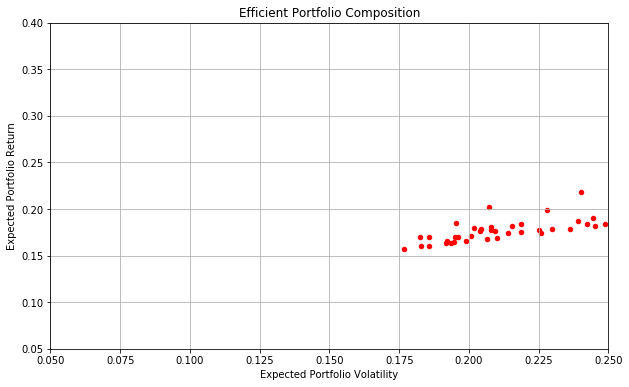

In [21]:
efficient_pfolios.plot(
    x="VOL",
    y="RTN",
    kind="scatter",
    color="red",
    figsize=(10,6)
)
plt.grid(True)
plt.title("Efficient Portfolio Composition")
plt.xlabel("Expected Portfolio Volatility")
plt.ylabel("Expected Portfolio Return")
plt.xlim(.05,.25)
plt.ylim(.05, .4)


(0.05, 0.4)

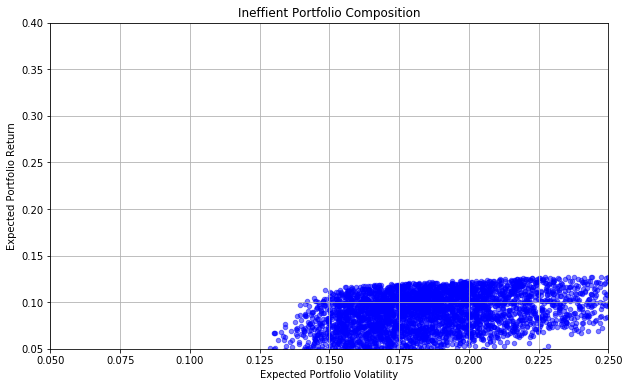

In [22]:
remaining_pfolios.plot(
    x="VOL",
    y="RTN",
    kind="scatter",
    color="blue",
    alpha=.5,
    figsize=(10,6)
)
plt.grid(True)
plt.title("Ineffient Portfolio Composition")
plt.xlabel("Expected Portfolio Volatility")
plt.ylabel("Expected Portfolio Return")
plt.xlim(.05,.25)
plt.ylim(.05, .4)

(0.05, 0.4)

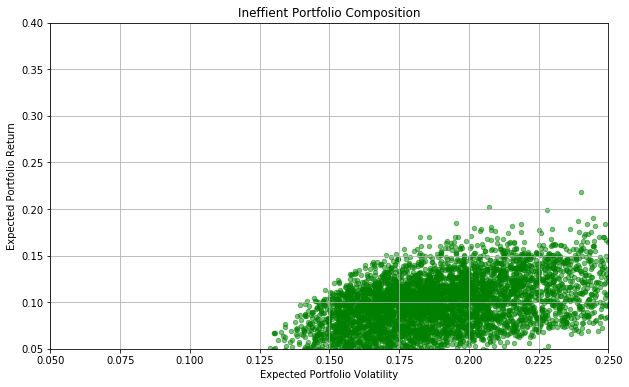

In [23]:
all_pfolios.plot(
    x="VOL",
    y="RTN",
    kind="scatter",
    color="green",
    alpha=.5,
    figsize=(10,6)
)
plt.grid(True)
plt.title("Ineffient Portfolio Composition")
plt.xlabel("Expected Portfolio Volatility")
plt.ylabel("Expected Portfolio Return")
plt.xlim(.05,.25)
plt.ylim(.05, .4)